In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Load the dataset
df=pd.read_csv('E:\Price_Predictorrr-main\Price_Predictorrr-main\Dinning set - flipkart_reviews.csv')
df

,Description,Days,Price,AvailableOn,Rating,Comment
0,Flipkart Perfect Homes Atiu Metal 4 Seater Din...,1,16489,Amazon,5,thank you very much flipkart sUuuuuuuper dinin...
1,Material: Particle Board,2,13057,Flipkart,5,"Compact yet spacious as you sit on corners, so..."
2,W x H x D: 120 cm x 45 cm x 39.5 cm (3 ft 11 i...,3,15106,Flipkart,5,beyond expectation.....superb thanks flipkart ...
3,Ideal TV Size: 43 inch,4,15101,Flipkart,5,perfect dining table for a small family. the d...
4,"Number of Drawers: 0, Number of Open Shelves: ...",5,15294,Flipkart,4,i am giving this r view after mostly 1 month o...
...,...,...,...,...,...,...
360,NaN,361,14205,Amazon,5,Awesome purchase. Loved it. Thnks to flipkart....
361,NaN,362,15576,Amazon,1,Material is good... but fitting is very very b...
362,NaN,363,14396,Flipkart,3,niceREAD MORE
363,NaN,364,16383,Amazon,4,Over all bult quality is goodREAD MORE


In [5]:
# Prepare the data
X = df['Days'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)
description = df['Description']
rating = df['Rating']
comment = df['Comment']
available_on = df['AvailableOn']

In [6]:
# Create the linear regression model
model = LinearRegression()

In [7]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [8]:
# Predict the prices for the given days
predicted_prices = model.predict(X)

In [9]:
# Find the best price and corresponding day
best_price_index = y.argmin()
best_day = X[best_price_index][0]
best_price = y[best_price_index][0]
best_description = description[best_price_index]
best_available_on = available_on[best_price_index]

# Check if the description is NaN, if so, fallback to the first line description
if pd.isnull(best_description):
    best_description = description.iloc[0]

best_review = comment[best_price_index]
best_rating = rating[best_price_index]

print("Best price: {} on day {}".format(best_price, best_day))
print("Description: ", best_description)
print("Review: ", best_review)
print("Rating: ", best_rating)
print("Available On: ", best_available_on)

Best price: 13016 on day 98
Description:  Flipkart Perfect Homes Atiu Metal 4 Seater Dining Set  (Finish Color -Satin Black, Knock Down)

Review:  Nice one you can go for it..READ MORE
Rating:  5
Available On:  Amazon


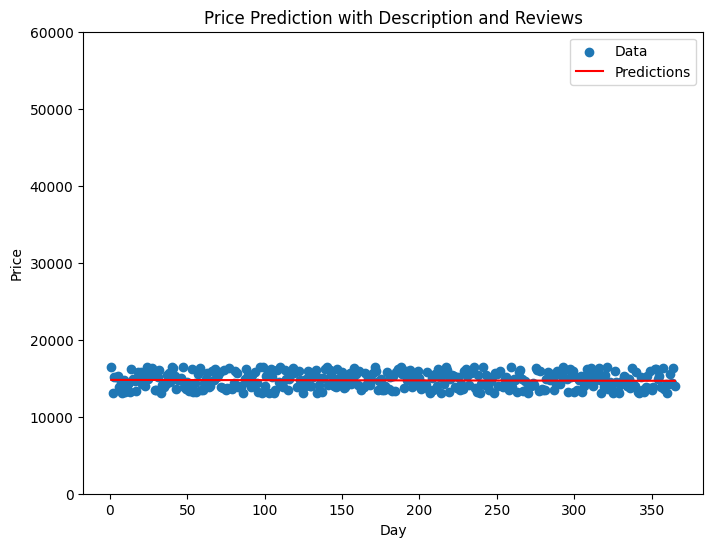

[[14699.80050663]]


In [10]:
# Plot the data and the predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, predicted_prices, color='red', label='Predictions')
plt.ylim(0, 60000)
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Price Prediction with Description and Reviews')
plt.show()

print(model.predict([[250]]))

In [ ]:
import pickle
filename = 'diningset.sav'
pickle.dump(model, open(filename, 'wb'))